<a href="https://colab.research.google.com/github/kavansingh582/164-final-project/blob/main/164_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
)

import warnings
warnings.filterwarnings("ignore")

# For reproducibility
RANDOM_STATE = 42


In [ ]:
# Load wine quality dataset
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(df_wine.shape)
df_wine.head()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Overview
df_wine.info()
df_wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Check for missing values
df_wine.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Feature-target split
X_wine = df_wine.drop("quality", axis=1)
y_wine = df_wine["quality"]

# Standardize features
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)


In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target)

X_cancer.shape


(569, 30)

In [ ]:
# Preprocess
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)


In [ ]:
#WINE QUALITY - REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine_scaled, y_wine, test_size=0.2, random_state=RANDOM_STATE)

models_reg = {
    "Linear Regression": LinearRegression(),
    "k-NN": KNeighborsRegressor(),
    "MLP": MLPRegressor(max_iter=500, random_state=RANDOM_STATE)
}

results_reg = {}
for name, model in models_reg.items():
    model.fit(X_train_w, y_train_w)
    preds = model.predict(X_test_w)
    results_reg[name] = {
        "MAE": mean_absolute_error(y_test_w, preds),
        "MSE": mean_squared_error(y_test_w, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test_w, preds)),
        "R2": r2_score(y_test_w, preds)
    }

pd.DataFrame(results_reg).T


,MAE,MSE,RMSE,R2
Linear Regression,0.503530,0.390025,0.624520,0.403180
k-NN,0.505625,0.438625,0.662288,0.328812
MLP,0.484685,0.364264,0.603543,0.442600


In [ ]:
#BREAST CANCER - CLASSIFICATION
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer_scaled, y_cancer, test_size=0.2, random_state=RANDOM_STATE)

models_clf = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "MLP": MLPClassifier(max_iter=500, random_state=RANDOM_STATE)
}

results_clf = {}
for name, model in models_clf.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)
    results_clf[name] = {
        "Accuracy": accuracy_score(y_test_c, preds),
        "Precision": precision_score(y_test_c, preds),
        "Recall": recall_score(y_test_c, preds),
        "F1": f1_score(y_test_c, preds),
        "ROC-AUC": roc_auc_score(y_test_c, model.predict_proba(X_test_c)[:,1])
    }

pd.DataFrame(results_clf).T


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.973684,0.972222,0.985915,0.979021,0.997380
k-NN,0.947368,0.957746,0.957746,0.957746,0.981657
MLP,0.973684,0.972222,0.985915,0.979021,0.995742


In [ ]:
# Grid Search on Breast Cancer MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001],
    'solver': ['adam', 'lbfgs']
}

grid = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_c, y_train_c)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best Score: 0.9780219780219781


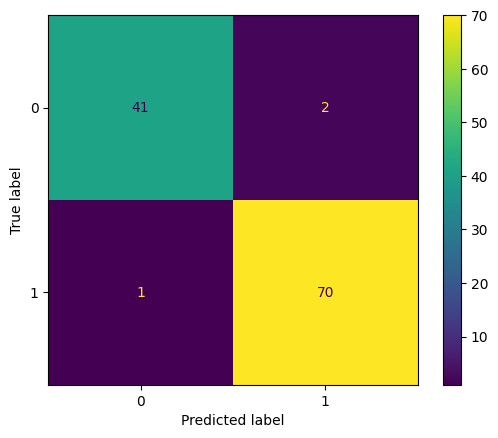

In [ ]:
#Confusion Matrix for Best Classifier
from sklearn.metrics import ConfusionMatrixDisplay

best_clf = grid.best_estimator_
y_pred_cancer = best_clf.predict(X_test_c)

ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred_cancer)
plt.show()


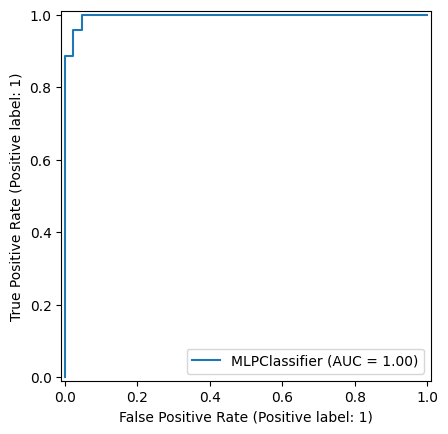

In [ ]:
#ROC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_clf, X_test_c, y_test_c)
plt.show()


In [ ]:
print("Wine Quality (Regression):")
display(pd.DataFrame(results_reg).T)

print("Breast Cancer (Classification):")
display(pd.DataFrame(results_clf).T)

print("Tuned MLP Breast Cancer Accuracy:", accuracy_score(y_test_c, best_clf.predict(X_test_c)))


Wine Quality (Regression):


,MAE,MSE,RMSE,R2
Linear Regression,0.503530,0.390025,0.624520,0.403180
k-NN,0.505625,0.438625,0.662288,0.328812
MLP,0.484685,0.364264,0.603543,0.442600


Breast Cancer (Classification):


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.973684,0.972222,0.985915,0.979021,0.997380
k-NN,0.947368,0.957746,0.957746,0.957746,0.981657
MLP,0.973684,0.972222,0.985915,0.979021,0.995742


Tuned MLP Breast Cancer Accuracy: 0.9736842105263158
